In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
sns.set()

In [3]:
data_raw = pd.read_csv('Airlines+Data.csv')
data_raw

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
data = data_raw.copy()
data['t'] = range(1, len(data)+1)
data['t_square'] = data['t']**2
data['Date'] = pd.to_datetime(data['Month'], format="%b-%y")
data['month'] = data['Date'].dt.strftime('%b')
data['year'] = data['Date'].dt.strftime('%Y')
data

,Month,Passengers,t,t_square,Date,month,year
0,Jan-95,112,1,1,1995-01-01,Jan,1995
1,Feb-95,118,2,4,1995-02-01,Feb,1995
2,Mar-95,132,3,9,1995-03-01,Mar,1995
3,Apr-95,129,4,16,1995-04-01,Apr,1995
4,May-95,121,5,25,1995-05-01,May,1995
...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,2002-08-01,Aug,2002
92,Sep-02,355,93,8649,2002-09-01,Sep,2002
93,Oct-02,306,94,8836,2002-10-01,Oct,2002
94,Nov-02,271,95,9025,2002-11-01,Nov,2002


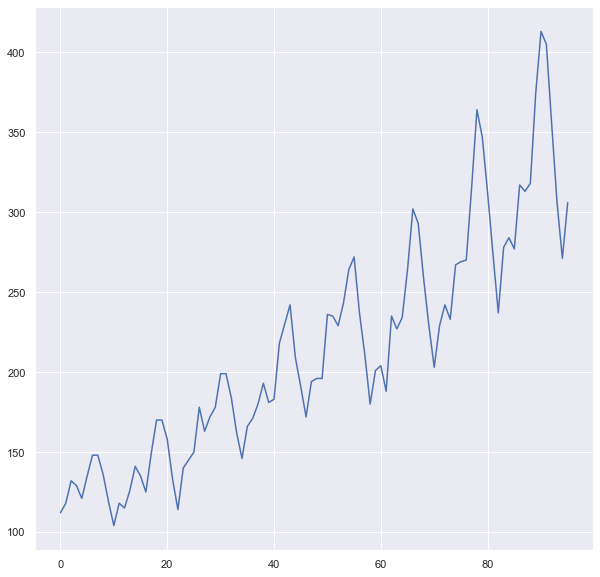

In [6]:
plt.figure(figsize = (10,10))
plt.plot(data['Passengers'])
plt.show()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

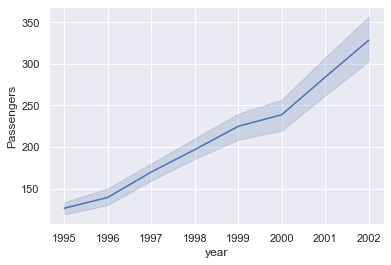

In [7]:
sns.lineplot(x = 'year', y = 'Passengers', data = data)

In [8]:
data_1 = data.drop(columns = ['Month', 'Date'])
data_with_dummies = pd.get_dummies(data_1)
data_with_dummies

,Passengers,t,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,month_Oct,month_Sep,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002
0,112,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,118,2,4,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,132,3,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,129,4,16,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,121,5,25,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,92,8464,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92,355,93,8649,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
93,306,94,8836,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
94,271,95,9025,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Quadratic Model

In [9]:
model = LinearRegression()
model.fit(data_with_dummies[['t', 't_square']][0:84], data_with_dummies['Passengers'][0:84])
pred = model.predict(data_with_dummies[['t', 't_square']][84:])
rmse = np.sqrt(np.mean((data_with_dummies['Passengers'][84:] - pred)**2))
rmse

48.05188897933072

# Added Seasonility and quadratic log model

In [10]:
X = data_with_dummies.drop('Passengers', axis = 1)

In [11]:
model = LinearRegression()
model.fit(X[0:84], np.log(data_with_dummies['Passengers'][0:84]))
pred = model.predict(X[84:])
rmse = np.sqrt(np.mean((data_with_dummies['Passengers'][84:] - np.exp(pred))**2))
rmse

27.83101337536523

# Added Seasonility and quadratic model

In [12]:
model = LinearRegression()
model.fit(X[0:84], data_with_dummies['Passengers'][0:84])
pred = model.predict(X[84:])
rmse = np.sqrt(np.mean((data_with_dummies['Passengers'][84:] - pred)**2))
rmse

22.543116926510038

In [13]:
pred_df = pd.DataFrame()
pred_df['Month'] = data['Month'][84:]
pred_df['Actual'] = data_with_dummies['Passengers'][84:]
pred_df['Predicted'] = pred
pred_df['% Error'] = abs(data_with_dummies['Passengers'][84:] - pred)/data_with_dummies['Passengers'][84:]*100
pred_df

,Month,Actual,Predicted,% Error
84,Jan-02,284,292.357168,2.942665
85,Feb-02,277,294.873651,6.452582
86,Mar-02,317,323.818706,2.151011
87,Apr-02,313,319.335190,2.024022
88,May-02,318,320.280245,0.717058
89,Jun-02,374,345.939585,7.502785
90,Jul-02,413,372.598926,9.782342
91,Aug-02,405,373.401124,7.802192
92,Sep-02,355,349.917607,1.431660
93,Oct-02,306,326.434091,6.677807
